In [1]:
##### Resistivity inversion and converted to the water content #####

import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
from pygimli.physics import ert
from mpl_toolkits.axes_grid1 import make_axes_locatable


# For Jupyter notebooks, use the current working directory
try:
    # For regular Python scripts
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # For Jupyter notebooks
    current_dir = os.getcwd()
# Add the parent directory (OPEN_ERT) to the path
parent_dir = os.path.dirname(os.path.dirname(current_dir))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)


# Import the time-lapse inversion class
from watershed_geophysics.inversion.time_lapse import TimeLapseERTInversion
from watershed_geophysics.inversion.windowed import WindowedTimeLapseERTInversion

In [2]:



data_dir = "results/TL_measurements/appres"

# List of ERT data files testing monthly time-lapse inversion
ert_files = [
    "synthetic_data30.dat",
    "synthetic_data60.dat",
    "synthetic_data90.dat",
    "synthetic_data120.dat",
    "synthetic_data150.dat",
    "synthetic_data180.dat",
    "synthetic_data210.dat",
    "synthetic_data240.dat",
    "synthetic_data270.dat",
    "synthetic_data300.dat",
    "synthetic_data330.dat",
    "synthetic_data360.dat",
]


# Full paths to data files
data_files = [os.path.join(data_dir, f) for f in ert_files]

# Measurement times (can be timestamps or any sequential numbers representing time)
# Measurement times (can be timestamps or any sequential numbers representing time)
measurement_times = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  # Adjust based on your actual acquisition times

# Create a mesh for the inversion (or load an existing one)
data = ert.load(os.path.join(data_dir, ert_files[0]))
ert_manager = ert.ERTManager(data)
mesh_with_interface = pg.load("results/Structure_WC/mesh_with_interface.bms")


In [4]:

# Set up inversion parameters
inversion_params = {
    "lambda_val": 50.0,              # Regularization parameter
    "alpha": 10.0,                   # Temporal regularization parameter
    "decay_rate": 0.0,               # Temporal decay rate
    "method": "cgls",                # Solver method ('cgls', 'lsqr', etc.)
    "model_constraints": (0.001, 1e4), # Min/max resistivity values (ohm-m)
    "max_iterations": 15,            # Maximum iterations
    "absoluteUError": 0.0,           # Absolute data error (V)
    "relativeError": 0.05,           # Relative data error (5%)
    "lambda_rate": 1.0,              # Lambda reduction rate
    "lambda_min": 1.0,               # Minimum lambda value
    "inversion_type": "L2"           # 'L1', 'L2', or 'L1L2'
}

# Define the window size (number of timesteps to process together)
window_size = 3  # A window size of 3 means each window includes 3 consecutive measurements

# Create the windowed time-lapse inversion object
inversion = WindowedTimeLapseERTInversion(
    data_dir=data_dir,               # Directory containing ERT data files
    ert_files=ert_files,             # List of ERT data filenames
    measurement_times=measurement_times,  # List of measurement times
    window_size=window_size,         # Size of sliding window
    mesh=mesh_with_interface,                       # Mesh for inversion
    **inversion_params               # Pass the same inversion parameters
)

# Run the inversion, optionally in parallel
print("Starting windowed time-lapse inversion...")
result = inversion.run()
print("Inversion complete!")


Starting windowed time-lapse inversion...

Processing 10 windows sequentially...
Using L2 inversion

Starting L2 inversion for window 0


14/05/25 - 22:54:49 - pyGIMLi - INFO - Found 3 regions.
14/05/25 - 22:54:49 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/05/25 - 22:54:49 - pyGIMLi - INFO - Found 3 regions.
14/05/25 - 22:54:49 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/05/25 - 22:54:49 - pyGIMLi - INFO - Found 3 regions.
14/05/25 - 22:54:49 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/05/25 - 22:54:50 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/05/25 - 22:54:50 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
14/05/25 - 22:54:50 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


14/05/25 - 22:55:30 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/05/25 - 22:55:30 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
14/05/25 - 22:55:30 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392
14/05/25 - 22:56:07 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/05/25 - 22:56:07 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
14/05/25 - 22:56:07 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


ERT chi2: 2615.1518946820647
dPhi: 1.0
ERTphi_d: 6496037.306390248, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 70.65825735854908
dPhi: 0.9729812033089804
ERTphi_d: 175515.11127863592, ERTphi_m: 4775.930844792401, ERTphi_t: 1880.4620560597652
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 4.3132657914707355
dPhi: 0.9389559557125298
ERTphi_d: 10714.152226013306, ERTphi_m: 1407.0369644274979, ERTphi_t: 1790.4930507074187
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 1.40891965626944
dPhi: 0.6733519972139193
ERTphi_d: 3499.7564261732887, ERTphi_m: 838.4573301900914, ERTphi_t: 1730.2302794051218
Convergence reached at iteration 3
End of inversion

Window 0 results:
Model shape: (4501, 3)
Coverage available: True
Number of iterations: 4

Starting L2 inversion for window 1


14/05/25 - 23:13:14 - pyGIMLi - INFO - Found 3 regions.
14/05/25 - 23:13:14 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/05/25 - 23:13:14 - pyGIMLi - INFO - Found 3 regions.
14/05/25 - 23:13:14 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/05/25 - 23:13:14 - pyGIMLi - INFO - Found 3 regions.
14/05/25 - 23:13:14 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/05/25 - 23:13:15 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/05/25 - 23:13:15 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
14/05/25 - 23:13:15 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


14/05/25 - 23:14:00 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/05/25 - 23:14:00 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
14/05/25 - 23:14:00 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392
14/05/25 - 23:14:43 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/05/25 - 23:14:43 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
14/05/25 - 23:14:43 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


ERT chi2: 2425.0555151750286
dPhi: 1.0
ERTphi_d: 6023837.899694771, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 59.430592976329976
dPhi: 0.9754931000117576
ERTphi_d: 147625.59295320365, ERTphi_m: 4255.330540566276, ERTphi_t: 241.8070802982885
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 4.608209274367038
dPhi: 0.92246065462947
ERTphi_d: 11446.791837527722, ERTphi_m: 943.5027735912965, ERTphi_t: 226.4213814338325
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 1.1086497439506844
dPhi: 0.759418533763755
ERTphi_d: 2753.8859639735, ERTphi_m: 424.1418987071543, ERTphi_t: 212.3398654950654
Convergence reached at iteration 3
End of inversion

Window 1 results:
Model shape: (4501, 3)
Coverage available: True
Number of iterations: 4

Starting L2 inversion for window 2


14/05/25 - 23:32:11 - pyGIMLi - INFO - Found 3 regions.
14/05/25 - 23:32:11 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/05/25 - 23:32:11 - pyGIMLi - INFO - Found 3 regions.
14/05/25 - 23:32:11 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/05/25 - 23:32:11 - pyGIMLi - INFO - Found 3 regions.
14/05/25 - 23:32:11 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/05/25 - 23:32:11 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/05/25 - 23:32:12 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
14/05/25 - 23:32:12 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


14/05/25 - 23:32:58 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/05/25 - 23:32:58 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
14/05/25 - 23:32:59 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392
14/05/25 - 23:33:43 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/05/25 - 23:33:43 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
14/05/25 - 23:33:43 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


ERT chi2: 2361.5461075156036
dPhi: 1.0
ERTphi_d: 5866080.531068759, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 56.736305477157266
dPhi: 0.9759749321444141
ERTphi_d: 140932.98280525865, ERTphi_m: 4274.021903227939, ERTphi_t: 286.7356192363775
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 4.8878583510210065
dPhi: 0.9138495481876429
ERTphi_d: 12141.44014393618, ERTphi_m: 935.2362504632326, ERTphi_t: 282.628433568575
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 1.1934004285516977
dPhi: 0.755843900774577
ERTphi_d: 2964.406664522417, ERTphi_m: 406.6912651130906, ERTphi_t: 277.6951655111378
Convergence reached at iteration 3
End of inversion

Window 2 results:
Model shape: (4501, 3)
Coverage available: True
Number of iterations: 4

Starting L2 inversion for window 3


14/05/25 - 23:51:14 - pyGIMLi - INFO - Found 3 regions.
14/05/25 - 23:51:14 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/05/25 - 23:51:14 - pyGIMLi - INFO - Found 3 regions.
14/05/25 - 23:51:14 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/05/25 - 23:51:14 - pyGIMLi - INFO - Found 3 regions.
14/05/25 - 23:51:14 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
14/05/25 - 23:51:15 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/05/25 - 23:51:15 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
14/05/25 - 23:51:15 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


14/05/25 - 23:52:02 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/05/25 - 23:52:02 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
14/05/25 - 23:52:02 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392
14/05/25 - 23:52:47 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/05/25 - 23:52:48 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
14/05/25 - 23:52:48 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


ERT chi2: 2335.654820123236
dPhi: 1.0
ERTphi_d: 5801766.573186118, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 56.7515205616985
dPhi: 0.9757020943023146
ERTphi_d: 140970.77707525907, ERTphi_m: 4281.813723959287, ERTphi_t: 271.1966263392827
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 4.909066457819015
dPhi: 0.9134989440065834
ERTphi_d: 12194.121081222433, ERTphi_m: 909.961736625424, ERTphi_t: 263.1996628000229
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 1.1290739662482394
dPhi: 0.7700023057439191
ERTphi_d: 2804.619732160627, ERTphi_m: 365.48889221792217, ERTphi_t: 256.8814921324787
Convergence reached at iteration 3
End of inversion

Window 3 results:
Model shape: (4501, 3)
Coverage available: True
Number of iterations: 4

Starting L2 inversion for window 4


15/05/25 - 00:10:28 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 00:10:28 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 00:10:28 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 00:10:28 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 00:10:29 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 00:10:29 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 00:10:29 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 00:10:29 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 00:10:29 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


15/05/25 - 00:11:18 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 00:11:18 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 00:11:18 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392
15/05/25 - 00:12:04 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 00:12:04 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 00:12:04 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


ERT chi2: 2119.7930626599455
dPhi: 1.0
ERTphi_d: 5265565.967647305, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 52.25911003574446
dPhi: 0.9753470699775907
ERTphi_d: 129811.62932878925, ERTphi_m: 4583.50983066575, ERTphi_t: 2094.6964495996735
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 5.219230242075134
dPhi: 0.9001278391747342
ERTphi_d: 12964.567921314632, ERTphi_m: 1158.8942978923008, ERTphi_t: 2005.974955583015
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 1.310395635527105
dPhi: 0.74892932966182
ERTphi_d: 3255.0227586493284, ERTphi_m: 642.9514198030549, ERTphi_t: 1931.4167132133616
Convergence reached at iteration 3
End of inversion

Window 4 results:
Model shape: (4501, 3)
Coverage available: True
Number of iterations: 4

Starting L2 inversion for window 5


15/05/25 - 00:29:56 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 00:29:56 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 00:29:56 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 00:29:56 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 00:29:56 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 00:29:56 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 00:29:57 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 00:29:57 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 00:29:57 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


15/05/25 - 00:30:45 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 00:30:45 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 00:30:45 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392
15/05/25 - 00:31:33 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 00:31:33 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 00:31:33 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


ERT chi2: 1950.9391985278994
dPhi: 1.0
ERTphi_d: 4846132.969143302, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 49.35606901059145
dPhi: 0.9747013802132667
ERTphi_d: 122600.47542230916, ERTphi_m: 4412.117278992839, ERTphi_t: 2060.0705490401474
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 5.0908223042046865
dPhi: 0.8968551911394679
ERTphi_d: 12645.602603644442, ERTphi_m: 1112.7469359978254, ERTphi_t: 1985.6190422152804
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 1.3131165814204937
dPhi: 0.7420619886229489
ERTphi_d: 3261.7815882485065, ERTphi_m: 616.1135797508881, ERTphi_t: 1930.850355904761
Convergence reached at iteration 3
End of inversion

Window 5 results:
Model shape: (4501, 3)
Coverage available: True
Number of iterations: 4

Starting L2 inversion for window 6


15/05/25 - 00:49:31 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 00:49:31 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 00:49:31 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 00:49:31 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 00:49:31 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 00:49:31 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 00:49:31 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 00:49:32 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 00:49:32 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


15/05/25 - 00:50:21 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 00:50:21 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 00:50:21 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392
15/05/25 - 00:51:07 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 00:51:07 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 00:51:08 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


ERT chi2: 1883.8677635907934
dPhi: 1.0
ERTphi_d: 4679527.524759531, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 51.87530502812403
dPhi: 0.9724634042629161
ERTphi_d: 128858.2576898601, ERTphi_m: 4122.598421413774, ERTphi_t: 1441.457197567047
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 4.615120695446202
dPhi: 0.9110343410425418
ERTphi_d: 11463.959807488365, ERTphi_m: 1034.934620483614, ERTphi_t: 1361.6872604089463
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 1.25957634607471
dPhi: 0.7270761851759261
ERTphi_d: 3128.78764364958, ERTphi_m: 562.9876958593592, ERTphi_t: 1293.0081262915928
Convergence reached at iteration 3
End of inversion

Window 6 results:
Model shape: (4501, 3)
Coverage available: True
Number of iterations: 4

Starting L2 inversion for window 7


15/05/25 - 01:09:06 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 01:09:06 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 01:09:06 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 01:09:06 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 01:09:07 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 01:09:07 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 01:09:07 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 01:09:07 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 01:09:08 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


15/05/25 - 01:09:58 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 01:09:58 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 01:09:58 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392
15/05/25 - 01:10:46 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 01:10:46 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 01:10:47 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


ERT chi2: 2081.227373123059
dPhi: 1.0
ERTphi_d: 5169768.794837678, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 61.990461315856514
dPhi: 0.9702144695402336
ERTphi_d: 153984.3059085876, ERTphi_m: 4032.9204665442817, ERTphi_t: 1535.9471494055992
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 3.997799288906737
dPhi: 0.9355094444524784
ERTphi_d: 9930.533433644334, ERTphi_m: 1081.742536739346, ERTphi_t: 1435.281662979371
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 1.3076688370486327
dPhi: 0.6729028291447228
ERTphi_d: 3248.2493912288037, ERTphi_m: 624.1563614785115, ERTphi_t: 1358.1256535478485
Convergence reached at iteration 3
End of inversion

Window 7 results:
Model shape: (4501, 3)
Coverage available: True
Number of iterations: 4

Starting L2 inversion for window 8


15/05/25 - 01:28:45 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 01:28:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 01:28:45 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 01:28:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 01:28:45 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 01:28:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 01:28:46 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 01:28:46 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 01:28:46 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


15/05/25 - 01:29:36 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 01:29:36 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 01:29:37 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392
15/05/25 - 01:30:26 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 01:30:26 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 01:30:26 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


ERT chi2: 2340.235065216368
dPhi: 1.0
ERTphi_d: 5813143.901997459, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 72.73294838602695
dPhi: 0.9689206655061796
ERTphi_d: 180668.64379089093, ERTphi_m: 4145.199507761327, ERTphi_t: 706.2670636029111
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 3.7164646094906857
dPhi: 0.9489025992763869
ERTphi_d: 9231.698089974863, ERTphi_m: 1139.0522659546104, ERTphi_t: 671.0110929946245
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 1.2968840277947402
dPhi: 0.6510436223493411
ERTphi_d: 3221.4599250421347, ERTphi_m: 640.8846275807928, ERTphi_t: 649.8613551297171
Convergence reached at iteration 3
End of inversion

Window 8 results:
Model shape: (4501, 3)
Coverage available: True
Number of iterations: 4

Starting L2 inversion for window 9


15/05/25 - 01:48:20 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 01:48:20 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 01:48:20 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 01:48:20 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 01:48:21 - pyGIMLi - INFO - Found 3 regions.
15/05/25 - 01:48:21 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/05/25 - 01:48:21 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 01:48:21 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 01:48:22 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


15/05/25 - 01:49:14 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 01:49:14 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 01:49:14 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392
15/05/25 - 01:50:03 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/05/25 - 01:50:03 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/05/25 - 01:50:03 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11000 Cells: 21572 Boundaries: 16392


ERT chi2: 2547.60894011703
dPhi: 1.0
ERTphi_d: 6328260.6072507035, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 77.88733842075081
dPhi: 0.9694272785770751
ERTphi_d: 193472.148637145, ERTphi_m: 4870.533872848236, ERTphi_t: 859.9889368736467
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 3.9583181636133937
dPhi: 0.9491789263329248
ERTphi_d: 9832.46231841567, ERTphi_m: 1636.1989507560886, ERTphi_t: 825.8420570181897
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 1.4334136202986856
dPhi: 0.6378730660220152
ERTphi_d: 3560.599432821935, ERTphi_m: 1057.6169903871714, ERTphi_t: 797.6963953814823
Convergence reached at iteration 3
End of inversion

Window 9 results:
Model shape: (4501, 3)
Coverage available: True
Number of iterations: 4

Final result summary:
Model shape: (4501, 12)
Number of coverage arrays: 12
Number of chi2 values: 40
Mesh exists: True
Inversion complete!


In [7]:
result.final_models = np.array(result.final_models)
result.final_models.shape

(4501, 12)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x24ec9d9acd0>)

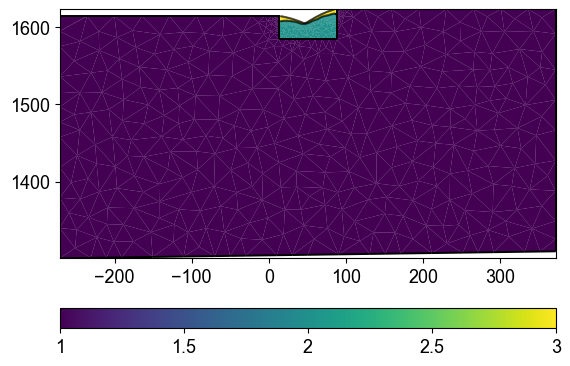

In [26]:
pg.show(mesh_with_interface,temp_marker)

In [ ]:
temp_marker = mesh_with_interface.cellMarkers()
index_marker = temp_marker[temp_marker != 1]


15/05/25 - 10:44:21 - pyGIMLi - WARNING - Keyword argument changed from 'cmap' to 'cMap' and will be removed in v 


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x24ec9a040d0>)

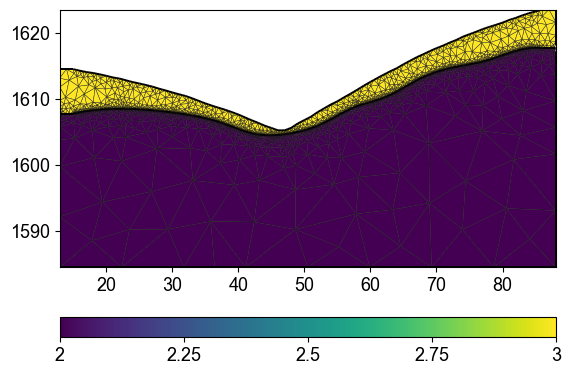

In [30]:
pg.show(result.mesh,values_not_one,cmap="viridis",clim=(0,1e4),showMesh=True)

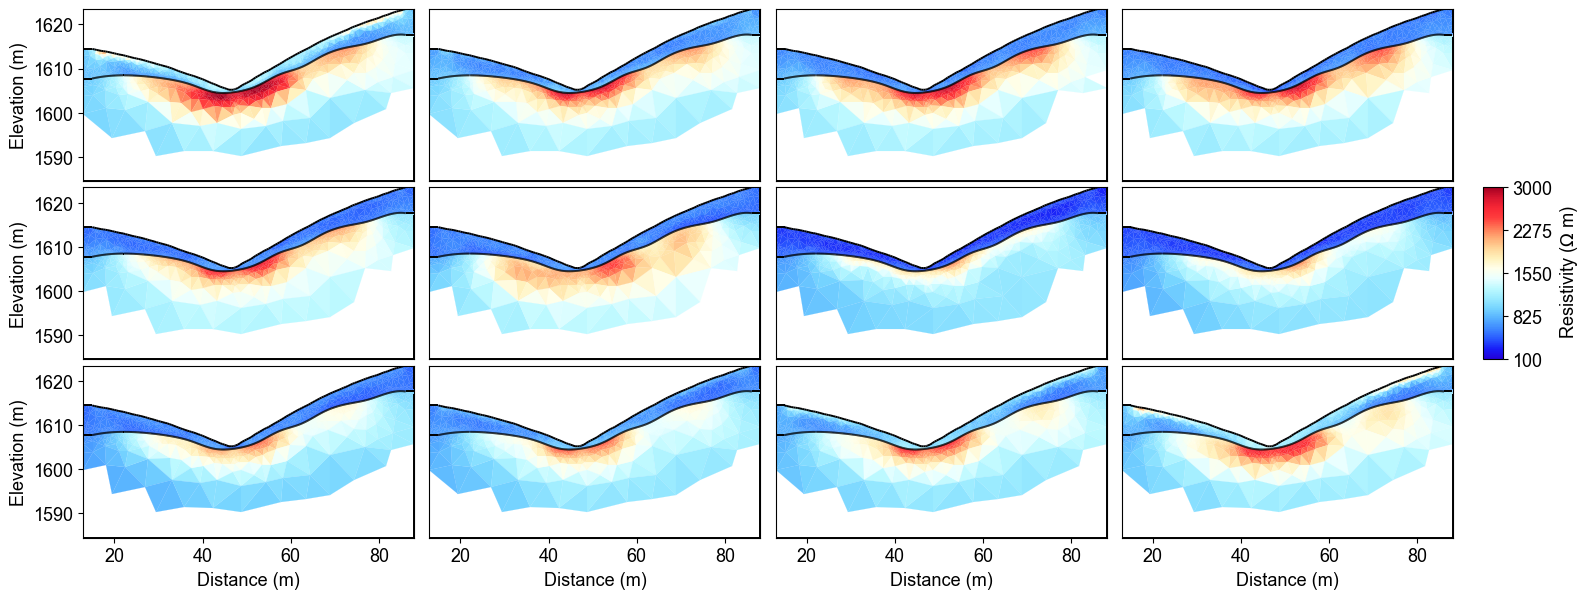

In [13]:
from palettable.lightbartlein.diverging import BlueDarkRed18_18
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab
params = {'legend.fontsize': 13,
          #'figure.figsize': (15, 5),
         'axes.labelsize': 13,
         'axes.titlesize':13,
         'xtick.labelsize':13,
         'ytick.labelsize':13}

pylab.rcParams.update(params)
plt.rcParams["font.family"] = "Arial"

fixed_cmap = BlueDarkRed18_18.mpl_colormap
fig = plt.figure(figsize=[16, 6])

# Use tight_layout with adjusted parameters to reduce space
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# True resistivity model
for i in range(12):
    row, col = i // 4, i % 4
    ax = fig.add_subplot(3, 4, i+1)
    
    # Add common ylabel only to leftmost panels
    ylabel = "Elevation (m)" if col == 0 else None
    
    # Add resistivity label only to the middle-right panel (row 1, col 3)
    resistivity_label = ' Resistivity ($\Omega$ m)' if (i == 7) else None
    
    # Only show axis ticks on leftmost and bottom panels
    if col != 0:
        ax.set_yticks([])
    
    if row != 2:  # Not bottom row
        ax.set_xticks([])
    else:
        # Add "distance (m)" label to bottom row panels
        ax.set_xlabel("Distance (m)")
    
    # Create the plot
    ax, cbar = pg.show(result.mesh,
                      result.final_models[:,i][result.mesh.cellMarkers()],
                      pad=0.3,
                      orientation="vertical",
                      cMap=fixed_cmap,
                      cMin=100,
                      cMax=3000,
                      ylabel=ylabel,
                      label=resistivity_label,
                      ax=ax,
                      logScale=False,
                      coverage=result.all_coverage[i][result.mesh.cellMarkers()]>-1.2)
    
    # Only keep colorbar for the middle-right panel (row 1, col 3)
    # This corresponds to panel index 7 in a 0-based indexing system
    if i != 7:  # Keep only the colorbar for panel 7
        cbar.remove()

plt.tight_layout()
plt.savefig("results/TL_measurements/appres/timelapse_ert_with structure.tiff", dpi=300, bbox_inches='tight')